# w_01 | `pandas plot()`

* Este notebook describe la funcionalidad del método `plot()` de `DataFrame` y `Series`.
* Además se cubre backends alternativos, en particular `Plotly Express`

* Primero traemos un dataset.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY.csv"
data = pd.read_csv(url, index_col=0, parse_dates=True, dayfirst=True)
data.head()

,dia,cantPersonasConInfeccionEnCurso,cantCasosNuevosAjustado,cantCasosNuevosConsolidado,cantCasosNuevosOriginal,acumCasos,cantFallecidos,acumFallecidos,cantCTI,cantCI,cantRecuperados,acumRecuperados,cantTest,acumTest,DIA,Egresades,reportadosFueraFecha,Positividad
fecha,,,,,,,,,,,,,,,,,,
2020-03-25,13,217,28,28,28,217,0,0,4,2,0,0,320,1858,3_MIERCOLES,NaN,NaN,0.088
2020-03-26,14,238,21,21,21,238,0,0,4,2,0,0,245,2103,4_JUEVES,NaN,NaN,0.086
2020-03-27,15,274,36,36,36,274,0,0,8,0,0,0,451,2554,5_VIERNES,NaN,NaN,0.080
2020-03-28,16,303,30,30,30,304,1,1,8,5,0,0,372,2926,6_SABADO,NaN,NaN,0.081
2020-03-29,17,309,6,6,6,309,0,1,10,2,0,0,200,3126,7_DOMINGO,NaN,NaN,0.030


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2020-03-25 to 2022-04-17
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   dia                              753 non-null    int64  
 1   cantPersonasConInfeccionEnCurso  753 non-null    int64  
 2   cantCasosNuevosAjustado          753 non-null    int64  
 3   cantCasosNuevosConsolidado       753 non-null    int64  
 4   cantCasosNuevosOriginal          753 non-null    int64  
 5   acumCasos                        753 non-null    int64  
 6   cantFallecidos                   753 non-null    int64  
 7   acumFallecidos                   753 non-null    int64  
 8   cantCTI                          753 non-null    int64  
 9   cantCI                           753 non-null    int64  
 10  cantRecuperados                  753 non-null    int64  
 11  acumRecuperados                  753 non-null    int64  
 12  can

* Como vimos, el backend por defecto es Matplotlib.

In [3]:
pd.options.plotting.backend

'matplotlib'

* `plot()` sin argumentos grafica líneas.
    * Cada columna es una línea.
    * El índice se usa para el eje de las x.

<Axes: xlabel='fecha'>

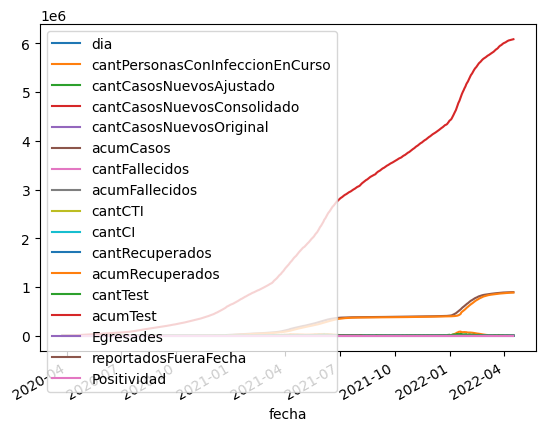

In [4]:
data.plot()

<Axes: >

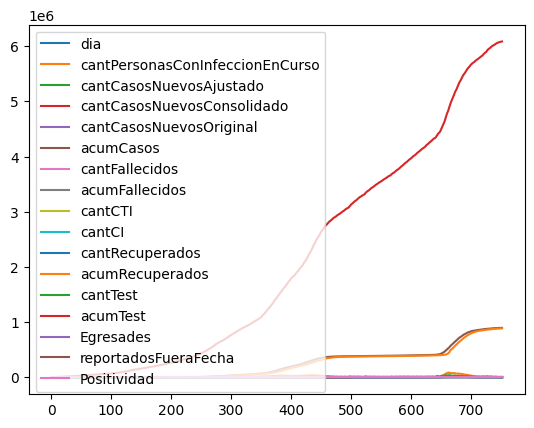

In [5]:
data.reset_index(drop=True).plot()

* Se puede especificar una columna distinta que el `index` para usar como eje x.

<Axes: xlabel='dia'>

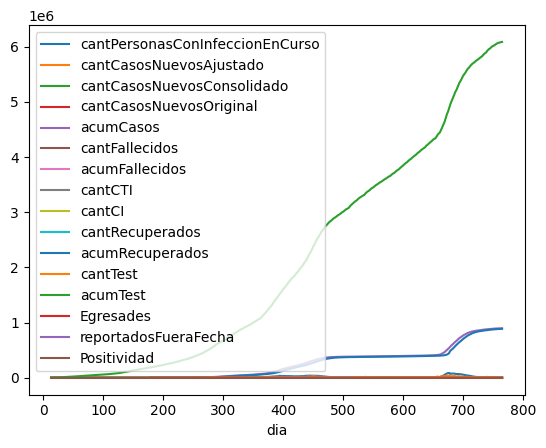

In [6]:
data.plot(x="dia")

* Se puede especificar solo algunas columnas para graficar.

<Axes: xlabel='fecha'>

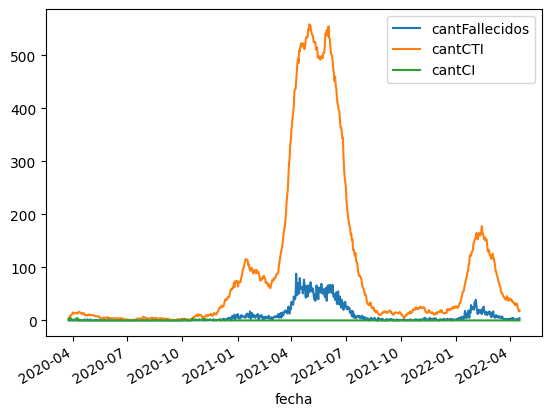

In [7]:
data.plot(y=["cantFallecidos", "cantCTI", "cantCI"])

* Notar que esto es lo mismo que slicear el df previamente.

<Axes: xlabel='fecha'>

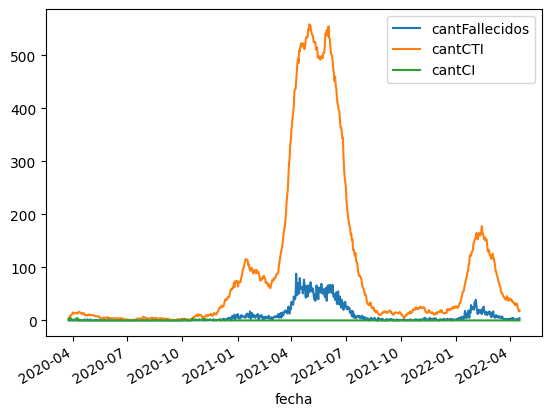

In [8]:
data[["cantFallecidos", "cantCTI", "cantCI"]].plot()

* El parámetro `subplots` es particularmente útil.
    * Crea un gráfico por cada columna.
* Combinar con `sharex` o `sharey` logra aún mejores resultados.
* Si no se define `layout`, apila los gráficos verticalmente.
    * `layout` acepta un `tuple` de `(filas, columnas)`.

array([[<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>],
       [<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>]], dtype=object)

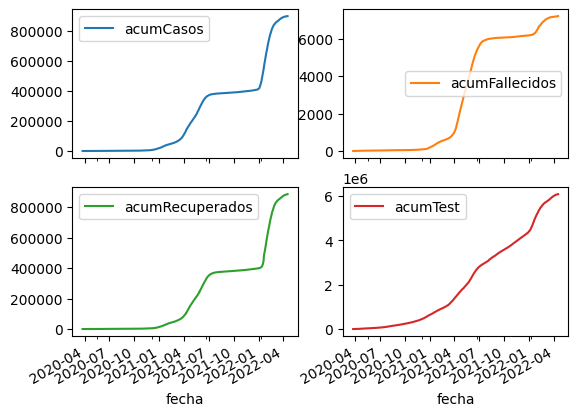

In [9]:
data.loc[:, data.columns.str.contains("acum")].plot(subplots=True,
                                                    sharex=True, layout=(2, 2))

* La anterior quedó un poco difícil de ver.
* Para eso podemos definir el `figsize` como un `tuple`.

array([[<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>],
       [<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>]], dtype=object)

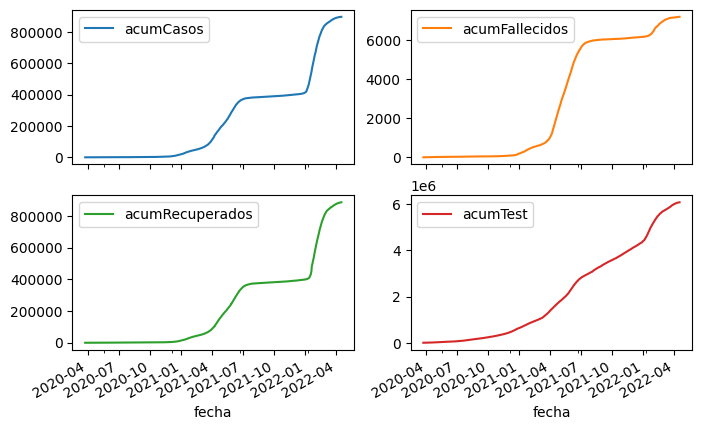

In [10]:
data.loc[:, data.columns.str.contains("acum")].plot(subplots=True, sharex=True,
                                                    layout=(2, 2), figsize=(8, 5))

* Podemos definir un título para el gráfico con `title`.

array([[<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
        <Axes: xlabel='fecha'>]], dtype=object)

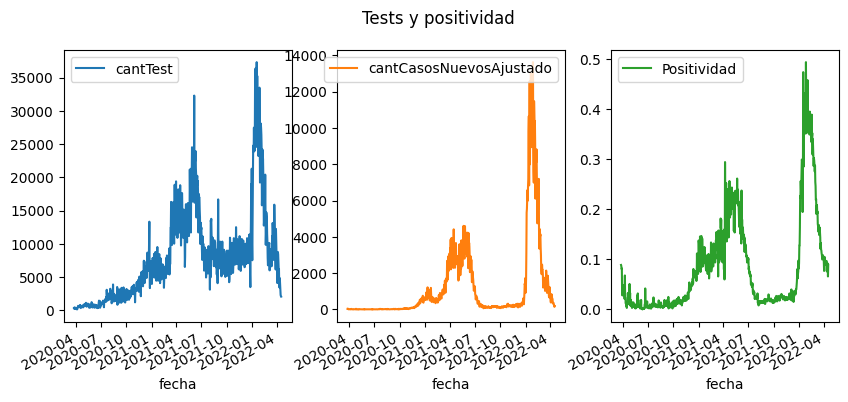

In [11]:
data.plot(y=["cantTest", "cantCasosNuevosAjustado", "Positividad"],
          subplots=True, layout=(1, 3), figsize=(10, 4), title="Tests y positividad")

* La leyenda de los ejes se puede modificar con `xlabel` y `ylabel`.

array([[<Axes: >, <Axes: >, <Axes: >]], dtype=object)

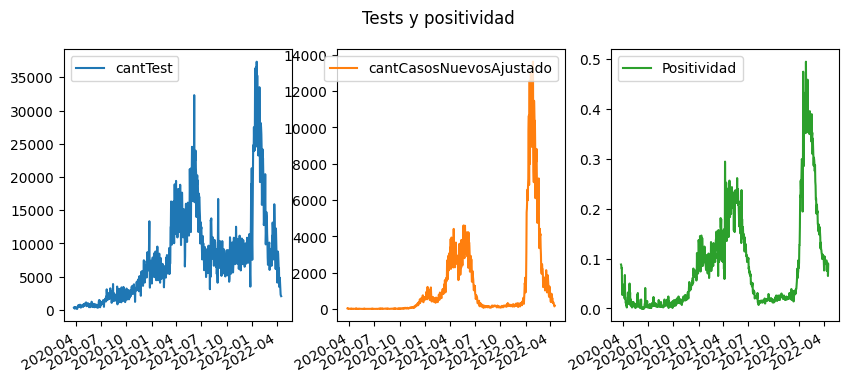

In [12]:
data.plot(y=["cantTest", "cantCasosNuevosAjustado", "Positividad"],
          subplots=True, layout=(1, 3), figsize=(10, 4), title="Tests y positividad", xlabel="")

* `colormap` define los colores de los gráficos.
* Ver las opciones en la [documentación de MPL](https://matplotlib.org/stable/gallery/color/colormap_reference.html).
* Creamos una variable llamada 'CFR' que es "Case Fatality Rate" o "Tasa de Letalidad". Se multiplica por 100 para obtener el porcentaje.
* `data.rolling(7).mean()` En esta línea de código, se calcula la media móvil con ventana de tamaño 7 para todas las columnas en el DataFrame data. La media móvil es una técnica que suaviza los datos y ayuda a visualizar tendencias a largo plazo. Esto calcula la media de los últimos 7 días para cada fila de datos.
* `data.loc[data.index > "2021-01-01": `: Aquí, se filtran las filas en el DataFrame data y se seleccionan solo las filas con índices (fechas) mayores a "2021-01-01".

array([[<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
        <Axes: xlabel='fecha'>]], dtype=object)

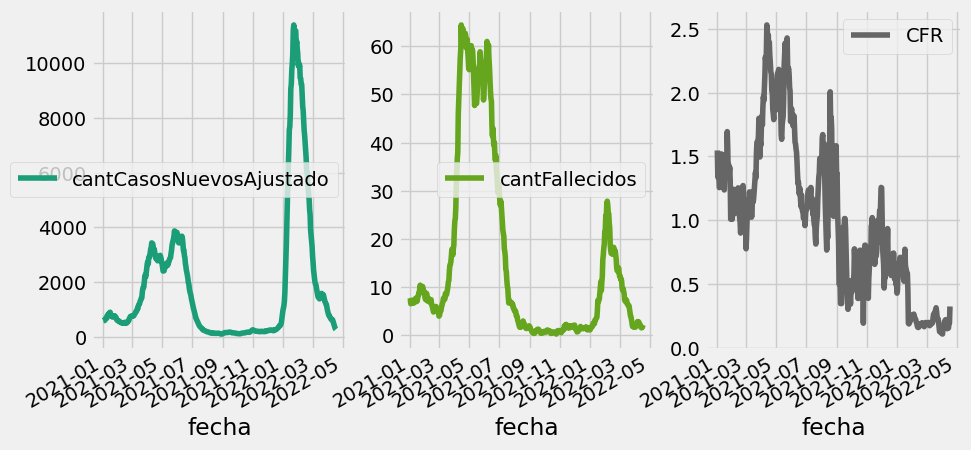

In [16]:
data["CFR"] = (data["cantFallecidos"]
               / data["cantCasosNuevosAjustado"].shift(14)) * 100
data = data.apply(pd.to_numeric,errors='coerce')
data.rolling(7).mean().loc[data.index > "2021-01-01"].plot(y=["cantCasosNuevosAjustado", "cantFallecidos", "CFR"],
                                                           figsize=(10, 5), colormap="Dark2", subplots=True,
                                                           layout=(1, 3))

* También es posible definir un estilo para todos los gráficos.
* Ver galería de estilos en [la documentación](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).
* Notar que es la primera vez que necesitamos importar Matplotlib directamente.
    * El statement clásico es `import matplotlib.pyplot as plt`

array([[<Axes: xlabel='fecha'>, <Axes: xlabel='fecha'>,
        <Axes: xlabel='fecha'>]], dtype=object)

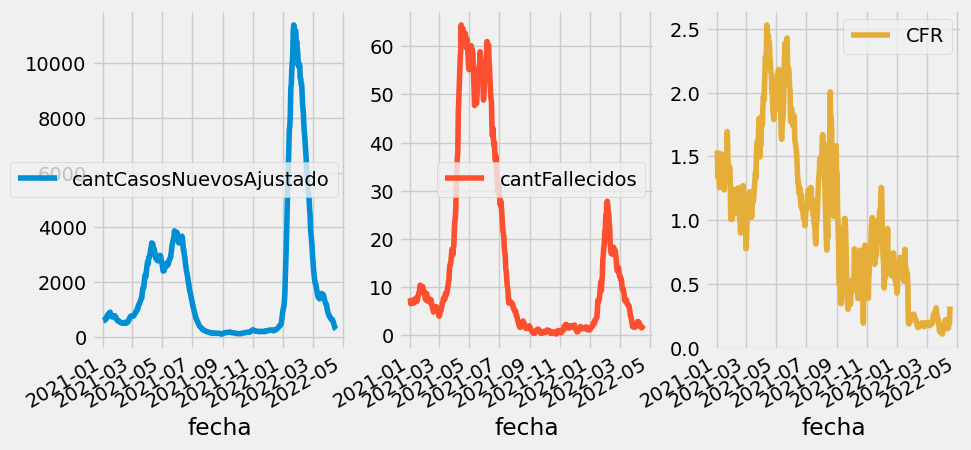

In [17]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

data.rolling(7).mean().loc[data.index > "2021-01-01"].plot(y=["cantCasosNuevosAjustado", "cantFallecidos", "CFR"],
                                                           figsize=(10, 5), subplots=True,
                                                           layout=(1, 3))

* Uno de los problemas de MPL es que las modificaciones que necesitemos hacer más allá del setup básico son bastante verbosas.
* Por ejemplo, cambiar la ubicación de la leyenda de esos 3 gráficos requiere crear subplots de ante mano, ir agregando los plots individuales y cambiando las leyendas en un loop.
* `bbox_to_anchor=(0.5, -0.3)` : Este argumento define la posición de la leyenda con respecto a los ejes del gráfico. El valor (0.5, -0.3) indica que la leyenda se colocará en la posición horizontal central (0.5) y en la posición vertical -0.3 unidades por debajo del gráfico. Los valores en el eje vertical son negativos porque -0.3 coloca la leyenda debajo del gráfico principal.

* `loc="lower center"`: Este argumento especifica la posición relativa de la leyenda dentro de la caja definida por bbox_to_anchor. "lower center" significa que la leyenda se colocará en la parte inferior central de la caja. Las opciones disponibles para loc pueden ser combinaciones de palabras clave que indiquen la posición en la caja, como "upper left", "upper right", "lower left", "lower right", "center", "center left", "center right", etc.

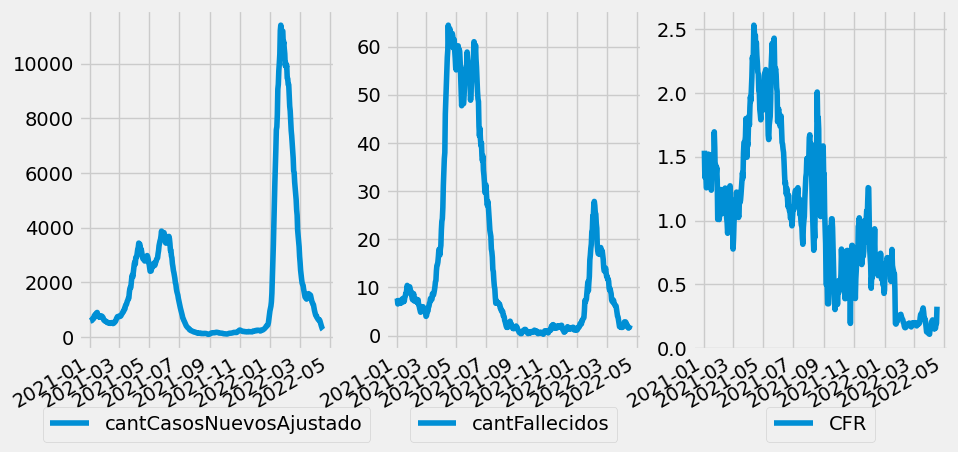

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for ax, col in zip(axes, ["cantCasosNuevosAjustado", "cantFallecidos", "CFR"]):
    data.rolling(7).mean().loc[data.index > "2021-01-01", col].plot(ax=ax, xlabel="")
    ax.legend(bbox_to_anchor=(0.5, -0.3), loc="lower center")
plt.show()

* Notar que el estilo elegido quedó fijado para todas las figuras.
* Se puede usar un estilo para un bloque de código particular usando un context manager.

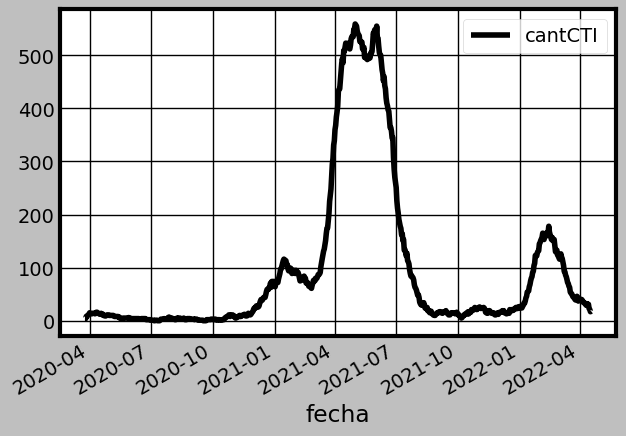

In [19]:
with plt.style.context("grayscale"):
    data.plot(y="cantCTI")
plt.show()

* Hasta ahora vimos solo el gráfico por defecto que es de líneas, pero pandas admite varios otros.
* El parámetro `kind` define el tipo de gráfico.
* Notar el uso de `ravel()`, un método de numpy, para transformar una matriz de 2x2 en una lista y poder iterar.

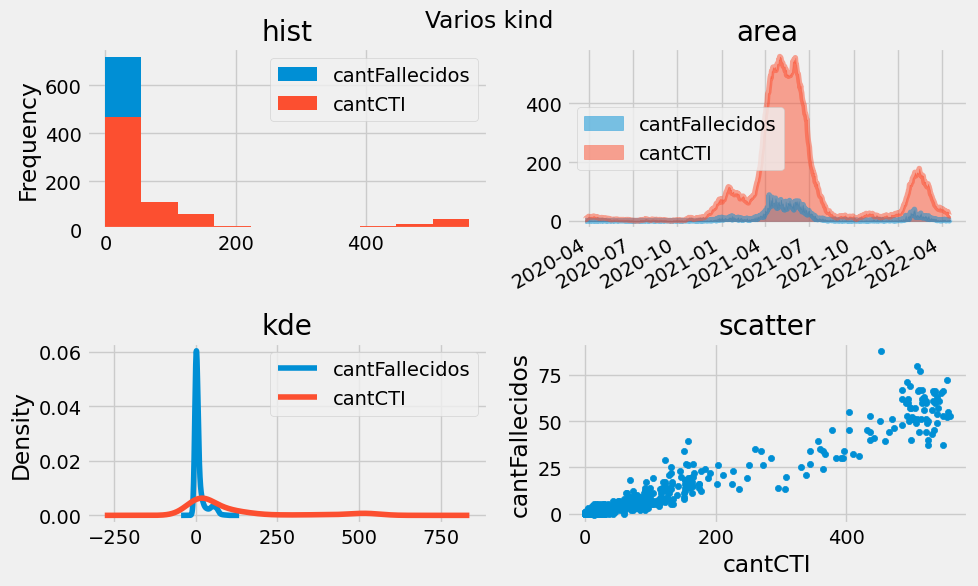

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for ax, kind in zip(axes.ravel(), ["hist", "area", "kde", "scatter"]):
    if kind in ["hexbin", "scatter"]:
        data.plot(y="cantFallecidos", x="cantCTI", ax=ax, kind=kind, title=kind)
    else:
        data.plot(y=["cantFallecidos", "cantCTI"], ax=ax, kind=kind, stacked=False, xlabel="", title=kind)
fig.tight_layout()
fig.suptitle("Varios kind")
plt.show()

* Cuidado con `kind="bar"`, porque asume que los datos son categóricos.

<Axes: xlabel='fecha'>

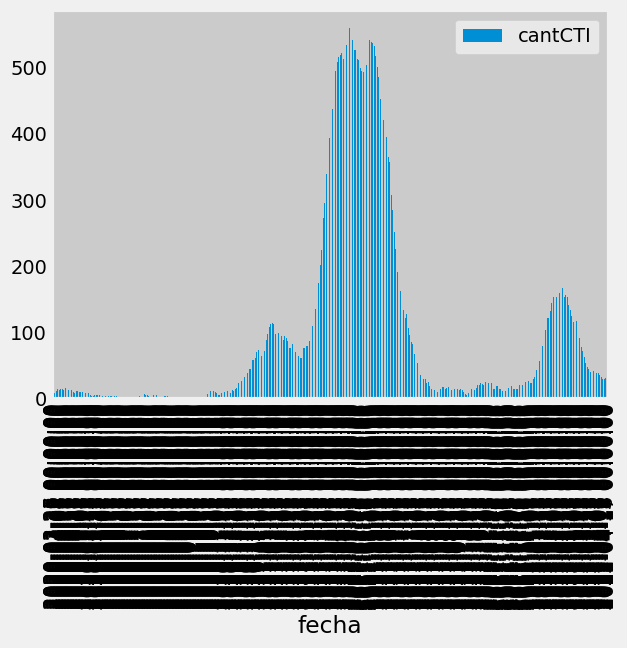

In [21]:
data.reset_index().plot(kind="bar", y="cantCTI", x="fecha")

* `plt.bar()` no tiene ese problema, pero no formatea las fechas tan bien.

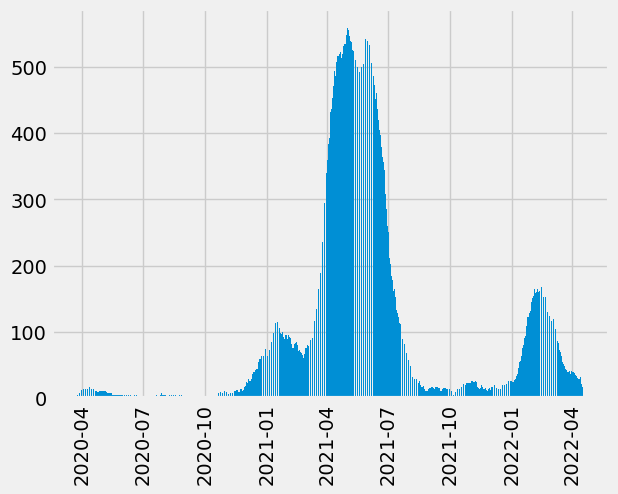

In [22]:
plt.bar(height=data.loc[:, "cantCTI"], x=data.index)
plt.xticks(rotation=90)
plt.show()

* Formatearlas bien es algo engorroso.
* `mdates` de `matplotlib.dates` proporciona funciones para trabajar con fechas y horas en las visualizaciones.
* `_, ax = plt.subplots()` Crea un nuevo conjunto de ejes (subplots) utilizando `plt.subplots()`. El subguión `_` es una convención para ignorar el valor que devuelve `plt.subplots()` que representa la figura. La variable `ax` se utiliza para referenciar los ejes del gráfico.
* `locator = mdates.AutoDateLocator(minticks=3, maxticks=7)`: se crea un localizador de fechas automático utilizando `mdates.AutoDateLocator()`. Este localizador determinará automáticamente la ubicación y cantidad de marcas en el eje X para las fechas. Se establecen los argumentos `minticks=3` y `maxticks=7`, lo que indica que se deben mostrar entre 3 y 7 marcas de fecha en el eje X.

* `formatter = mdates.ConciseDateFormatter(locator)`: Se crea un formateador de fechas conciso utilizando `mdates.ConciseDateFormatter()`. Este formateador tomará las marcas de fecha generadas por el localizador y las formateará en un formato más conciso y legible.

* `ax.xaxis.set_major_locator(locator)`: Se establece el localizador de fechas creado anteriormente en el eje X utilizando `ax.xaxis.set_major_locator()`. Esto asegura que las marcas de fecha se posicionen correctamente en el eje X.
* `ax.xaxis.set_major_formatter(formatter)`: Se establece el formateador de fechas creado anteriormente en el eje X utilizando `ax.xaxis.set_major_formatter()`. Esto garantiza que las fechas se muestren en el formato conciso y legible proporcionado por el formateador.

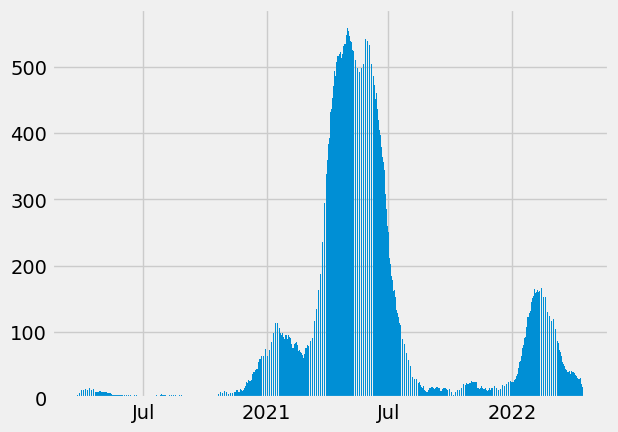

In [23]:
import matplotlib.dates as mdates

_, ax = plt.subplots()
ax.bar(height=data.loc[:, "cantCTI"], x=data.index)
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.show()

* Podemos cambiar el backend de pandas si lo tenemos instalado.

In [24]:
pd.options.plotting.backend = "plotly"

data.plot(y="acumCasos", kind="bar")

* Pero no todas las opciones funcionan.
* el método `bar()` de `plotly` no acepta el argumento `figsize`, que es un argumento específico de `matplotlib`

In [25]:
import traceback

try:
    data.plot(y="acumCasos", kind="bar", figsize=(6, 4))
except TypeError:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\carlos\AppData\Local\Temp\ipykernel_16760\4180846465.py", line 4, in <module>
    data.plot(y="acumCasos", kind="bar", figsize=(6, 4))
  File "f:\Personal\django\CPE\CPEDS\envWindows\Lib\site-packages\pandas\plotting\_core.py", line 957, in __call__
    return plot_backend.plot(self._parent, x=x, y=y, kind=kind, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\Personal\django\CPE\CPEDS\envWindows\Lib\site-packages\plotly\__init__.py", line 107, in plot
    return bar(data_frame, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: bar() got an unexpected keyword argument 'figsize'


* Por el contrario, pandas admite que pasemos `kwargs` (keyword arguments) que son transferidos a la función/método del paquete correspondiente.
    * En este caso pasamos `width`, `height` y `template`.

In [26]:
data.plot(y="acumCasos", kind="bar", width=600, height=400, template="seaborn")

* En estos casos es mejor ir a ver la documentación del backend que la de pandas directamente.

In [27]:
deptos_url = "https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY_porDepto_detalle.csv"
deptos = pd.read_csv(deptos_url, index_col=0, parse_dates=True, dayfirst=True)
deptos.head()

,departamento,enCurso,cantCasosNuevosCALC,cantCasosNuevosAPP,cantCasosNuevosConsolidado,cantFallecidos,acumFallecidos,cantRecuperados,acumRecuperados,acumcasos
fecha,,,,,,,,,,
2020-04-29,Artigas(UY-AR),0,0,0,0,0,0,0,0,0
2020-04-29,Canelones(UY-CA),17,0,0,0,0,2,0,66,85
2020-04-29,Cerro Largo(UY-CL),0,0,0,0,0,0,0,0,0
2020-04-29,Colonia(UY-CO),2,0,0,0,0,0,0,6,8
2020-04-29,Durazno(UY-DU),0,0,0,0,0,0,1,1,1


In [28]:
deptos.plot(y="enCurso", color="departamento", kind="area")

***Nota***:  recuerda que `.isin` es una función de la biblioteca pandas en Python que se utiliza para filtrar un DataFrame o una Serie basándose en una condición de pertenencia. Su objetivo es seleccionar filas que contengan valores específicos en una columna determinada.

La sintaxis general del método `.isin()` es la siguiente:

`dataframe['columna'].isin(valores_a_buscar)`



In [29]:
fig = deptos.loc[deptos["departamento"]
                 .isin(["Rocha(UY-RO)", "Artigas(UY-AR)",
                        "Maldonado(UY-MA)", "Rivera(UY-RV)"])].plot(y="enCurso", facet_row="departamento",
                                                  kind="area", title="Casos en curso", width=600, height=800)
fig.update_yaxes(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()